In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [2]:
x_train=train_datagen.flow_from_directory(r"C:\Users\Divya Nitheyan\Downloads\Fertilizers_Recommendation\DatasetPlantDisease\Veg-dataset\Veg-dataset\train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [3]:
x_test=test_datagen.flow_from_directory(r'C:\Users\Divya Nitheyan\Downloads\Fertilizers_Recommendation\DatasetPlantDisease\Veg-dataset\Veg-dataset\test_set',target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [16]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 516128)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

475

In [7]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=1)

475/475 [==============================] - 517s 1s/step - loss: 1.4404 - accuracy: 0.5870 - val_loss: 0.8111 - val_accuracy: 0.7093


In [18]:
model.save('vegetabledata.h5')

In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('vegetabledata.h5')

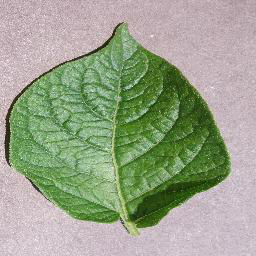

In [20]:
img=image.load_img(r"C:\Users\Divya Nitheyan\Downloads\Fertilizers_Recommendation\DatasetPlantDisease\Veg-dataset\Veg-dataset\test_set\Potato___healthy\bf2bffbb-cd8f-4d36-bd58-847808397c75___RS_HL 1786.jpg")
img

In [21]:
x=image.img_to_array(img)
x

array([[[199., 180., 186.],
        [181., 162., 168.],
        [227., 208., 214.],
        ...,
        [190., 171., 177.],
        [186., 167., 173.],
        [176., 157., 163.]],

       [[205., 186., 192.],
        [193., 174., 180.],
        [217., 198., 204.],
        ...,
        [188., 169., 175.],
        [189., 170., 176.],
        [184., 165., 171.]],

       [[184., 165., 171.],
        [191., 172., 178.],
        [194., 175., 181.],
        ...,
        [189., 170., 176.],
        [190., 171., 177.],
        [186., 167., 173.]],

       ...,

       [[210., 197., 204.],
        [219., 206., 213.],
        [198., 185., 192.],
        ...,
        [204., 193., 201.],
        [207., 196., 204.],
        [204., 193., 201.]],

       [[208., 195., 202.],
        [216., 203., 210.],
        [210., 197., 204.],
        ...,
        [200., 189., 197.],
        [203., 192., 200.],
        [199., 188., 196.]],

       [[199., 186., 193.],
        [205., 192., 199.],
        [217., 2

In [22]:
x=np.expand_dims(x,axis=0)
x

array([[[[199., 180., 186.],
         [181., 162., 168.],
         [227., 208., 214.],
         ...,
         [190., 171., 177.],
         [186., 167., 173.],
         [176., 157., 163.]],

        [[205., 186., 192.],
         [193., 174., 180.],
         [217., 198., 204.],
         ...,
         [188., 169., 175.],
         [189., 170., 176.],
         [184., 165., 171.]],

        [[184., 165., 171.],
         [191., 172., 178.],
         [194., 175., 181.],
         ...,
         [189., 170., 176.],
         [190., 171., 177.],
         [186., 167., 173.]],

        ...,

        [[210., 197., 204.],
         [219., 206., 213.],
         [198., 185., 192.],
         ...,
         [204., 193., 201.],
         [207., 196., 204.],
         [204., 193., 201.]],

        [[208., 195., 202.],
         [216., 203., 210.],
         [210., 197., 204.],
         ...,
         [200., 189., 197.],
         [203., 192., 200.],
         [199., 188., 196.]],

        [[199., 186., 193.],
       

In [23]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 1s 715ms/step


In [24]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [25]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Tomato___Leaf_Mold'

In [29]:
img=image.load_img(r"C:\Users\Divya Nitheyan\Downloads\Fertilizers_Recommendation\DatasetPlantDisease\Veg-dataset\Veg-dataset\test_set\Tomato___Leaf_Mold\b0171eb9-e9c4-4d17-8f39-e748361fdfba___Crnl_L.Mold 8828.jpg",target_size=(256,256))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 255ms/step


'Tomato___Septoria_leaf_spot'